## Problem Statement

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Importing the required libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#To use regular expressions
import re

#To use NLTK
import nltk

#For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

#For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

#For BOW and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#For encoding the category variable
import category_encoders as ce 

# For ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform Train Test Split
from sklearn.model_selection import train_test_split

#Performance Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /Users/aryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aryan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('./data/flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.Category.unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

In [8]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

## Data Exploration

Shape of the dataset

In [10]:
print(f'No of rows: {df.shape[0]}')

No of rows: 2225


Number of news article per category

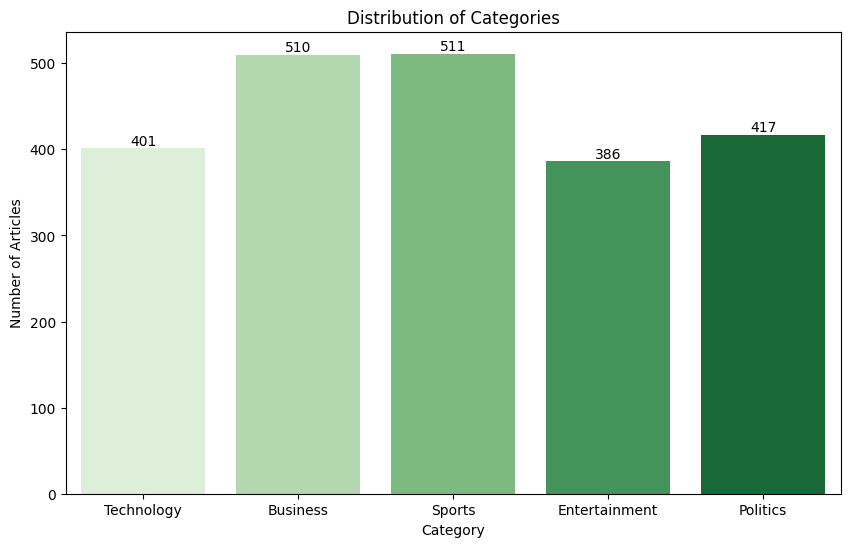

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Category', data = df, palette='Greens')

ax.bar_label(ax.containers[0])

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')

plt.show()

Most of the news articles in the dataset are from Business and Sports category

## Text Processing

In [17]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [23]:
stop_words = list(stopwords.words('english'))

def text_process(sent):
    # Removing non-letters
    sent = re.sub('[^a-zA-Z]',' ',sent)

    #Word tokenizing the text
    words = nltk.word_tokenize(sent)

    # Removing stopwords
    filtered_sent = [word for word in words if not word in stop_words]
    
    # lemmatizer
    lemmatizer = WordNetLemmatizer()
    new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
    new_txt = " ".join(new_txt)

    return new_txt

df['Article'] = df['Article'].apply(text_process)

After processing

In [24]:
df['Article'][0]

'tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel 

## Data Transformation

Encoding the category varibale using Ordinal Encoding from category encoders

In [31]:
encode = ce.OrdinalEncoder(cols = ['Category'])
df = encode.fit_transform(df)

Outcome after encoding

Category:

- 1 - Technology
- 2 - Business
- 3 - Sports
- 4 - Entertainment
- 5 - Politics

In [33]:
df.head()

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...


### Bag of Words / TF-IDF

We need to give user the option to select which one they would like to choose from the above options. 

In [40]:
option = int(input('Choose \n (1) If you want to use Bag of words \n (2) If you wnat to use TF-IDF'))

print(f'Choose \n (1) If you want to use Bag of words \n (2) If you wnat to use TF-IDF \n Choice: {option}')

if option == 1:
    cv = CountVectorizer(max_features= 5000)
    X = cv.fit_transform(df['Article']).toarray()
    y = np.array(df['Category'].values)

elif option == 2:
    tf_idf = TfidfVectorizer()
    X = tf_idf.fit_transform(df['Article']).toarray()
    y = np.array(df['Category'].values)

else: 
    print('Wrong Input !!!')

Choose 
 (1) If you want to use Bag of words 
 (2) If you wnat to use TF-IDF 
 Choice: 2


### Performing Train test split

In [41]:
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=0.25,shuffle=True, random_state=42)

In [42]:
print(f'No of rows in the train set is {X_train.shape[0]}')
print(f'No of rows in the test set is {X_val.shape[0]}')


No of rows in the train set is 1668
No of rows in the test set is 557
